In [33]:
import sys
sys.path.append(r'C:\Users\natha\OneDrive\Documents\DS 401\FinalProjectDS4010A\src')


In [34]:
from pathlib import Path

import pyarrow.compute as pc
import pandas as pd
import geopandas as gpd

from ghcnd.utils import GHCND

In [35]:
ghcnd = GHCND()
downloads = Path('C:/Users/natha/Downloads')

In [8]:
from datalake import Datalake
data = Datalake('../data')
data.query_states()

,name,geometry
0,New Mexico,"MULTIPOLYGON (((-109.05017 31.48, -109.04984 3..."
1,South Dakota,"MULTIPOLYGON (((-104.05788 44.99761, -104.0507..."
2,California,"MULTIPOLYGON (((-118.60441 33.47855, -118.5987..."
3,Kentucky,"MULTIPOLYGON (((-89.40565 36.52817, -89.39868 ..."
4,Alabama,"MULTIPOLYGON (((-88.05337 30.50699, -88.05109 ..."
5,Georgia,"MULTIPOLYGON (((-81.27939 31.30792, -81.27716 ..."
6,Arkansas,"MULTIPOLYGON (((-94.61792 36.49941, -94.61765 ..."
7,Pennsylvania,"MULTIPOLYGON (((-80.51989 40.90666, -80.51963 ..."
8,Missouri,"MULTIPOLYGON (((-95.77355 40.57821, -95.76853 ..."
9,Colorado,"MULTIPOLYGON (((-109.06025 38.59933, -109.0595..."


In [36]:
# Count the maximum memory usage of all the datafiles
mem_usage = []
years = range(1900, 2025+1)
for year in years:
    query = pc.field('year') == year
    mem_usage.append(ghcnd.query(query).memory_usage(deep=True))

mem_usage = pd.DataFrame(mem_usage, index=years)
f'NOAA GHCND Max Memory Usage: {mem_usage.sum().sum() / 10 ** 9} GB'

KeyboardInterrupt: 

In [37]:
# Define a pyarrow filter expression:
# get all records from CHICAGO OHARE AIRPORT in 2010
# ohare_station_id = 'USW00094846'
# query = (pc.field('station_id') == ohare_station_id) & (pc.field('year') == 2010)
query = pc.field('year') == 2021
# query the data using the helper function
data = ghcnd.query(query)


In [ ]:
#data.memory_usage(deep=True).sum() / 10 ** 9

In [66]:
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.longitude, data.latitude), crs='EPSG:4326')


Number of points within the bounding box: 286030


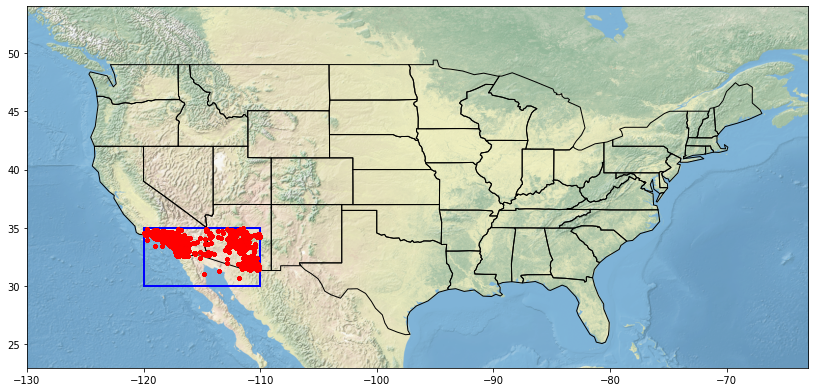

In [67]:
import pandas as pd
import geopandas as gpd
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Load the US boundary shapefile
world = gpd.read_file("../data/maps/ne_110m_admin_1_states_provinces/ne_110m_admin_1_states_provinces.shp")

# Load the raster map file
tif_file = "../data/maps/NE1_50M_SR_W/NE1_50M_SR_W.tif"

# Initialize the figure
fig, ax = plt.subplots(figsize=(14, 10))

# Plot the US boundary (world map)
world.plot(ax=ax, color="#00000000", edgecolor='black')

# Plot the raster data
with rasterio.open(tif_file) as src:
    show(src, ax=ax)

# Define the bounding box (left, bottom, width, height)
bbox = [-120, 30, 10, 5]  # For example: xmin=-120, ymin=30, width=10, height=5

# Add the rectangle to the plot
rect = Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=2, edgecolor='blue', facecolor='none')
ax.add_patch(rect)

# Filter the points within the bounding box
points_within_box = gdf[(gdf.geometry.x >= bbox[0]) & (gdf.geometry.x <= bbox[0] + bbox[2]) &
                        (gdf.geometry.y >= bbox[1]) & (gdf.geometry.y <= bbox[1] + bbox[3])]

# Plot all the points within the bounding box
points_within_box.plot(ax=ax, color='red', markersize=10)

# Count the number of points inside the bounding box
print(f"Number of points within the bounding box: {len(points_within_box)}")

# Set the coordinate range for the contiguous US
ax.set_xlim([-130, -63])
ax.set_ylim([23, 54])
ax.set_aspect('equal', adjustable='box')

# Show the plot
plt.show()


In [68]:
points_within_box


,station_id,latitude,longitude,elevation,name,year,month,day,PRCP,SNOW,SNWD,TMAX,TMIN,AWND,geometry
1029964,US1AZCH0002,31.4527,-110.1435,1314.0,HEREFORD 2.8 NW,2021,12,28,5.0,NaN,NaN,NaN,NaN,NaN,POINT (-110.1435 31.4527)
1029965,US1AZCH0002,31.4527,-110.1435,1314.0,HEREFORD 2.8 NW,2021,12,31,114.0,NaN,NaN,NaN,NaN,NaN,POINT (-110.1435 31.4527)
1029966,US1AZCH0002,31.4527,-110.1435,1314.0,HEREFORD 2.8 NW,2021,11,26,25.0,NaN,NaN,NaN,NaN,NaN,POINT (-110.1435 31.4527)
1029967,US1AZCH0002,31.4527,-110.1435,1314.0,HEREFORD 2.8 NW,2021,9,24,61.0,NaN,NaN,NaN,NaN,NaN,POINT (-110.1435 31.4527)
1029968,US1AZCH0002,31.4527,-110.1435,1314.0,HEREFORD 2.8 NW,2021,9,27,51.0,NaN,NaN,NaN,NaN,NaN,POINT (-110.1435 31.4527)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6936023,MXM00076113,30.7167,-111.8333,420.9,ALTAR (OBS),2021,1,7,0.0,NaN,NaN,247.0,30.0,NaN,POINT (-111.8333 30.7167)
6936024,MXM00076113,30.7167,-111.8333,420.9,ALTAR (OBS),2021,3,14,0.0,NaN,NaN,200.0,30.0,NaN,POINT (-111.8333 30.7167)
6936025,MXM00076113,30.7167,-111.8333,420.9,ALTAR (OBS),2021,2,24,0.0,NaN,NaN,285.0,55.0,NaN,POINT (-111.8333 30.7167)
6936026,MXM00076113,30.7167,-111.8333,420.9,ALTAR (OBS),2021,2,3,0.0,NaN,NaN,270.0,112.0,NaN,POINT (-111.8333 30.7167)


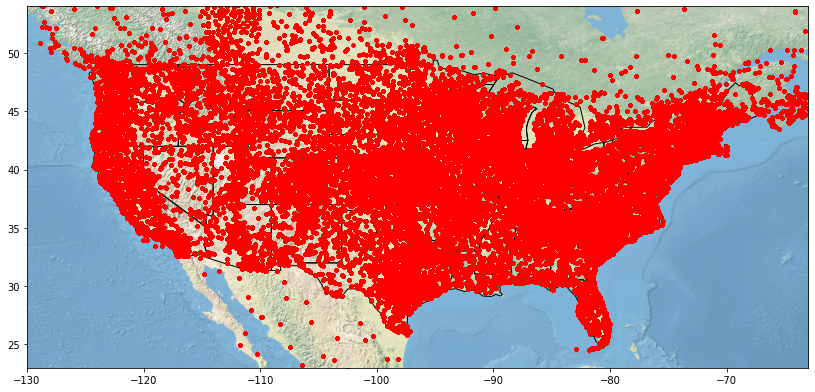

In [70]:
import pandas as pd
import geopandas as gpd
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt

# Load the US boundary shapefile
world = gpd.read_file("../data/maps/ne_110m_admin_1_states_provinces/ne_110m_admin_1_states_provinces.shp")

# Load the raster map file
tif_file = "../data/maps/NE1_50M_SR_W/NE1_50M_SR_W.tif"

# Initialize the figure
fig, ax = plt.subplots(figsize=(14, 10))

# Plot the US boundary
world.plot(ax=ax, color="#00000000", edgecolor='black')

# Plot the raster data
with rasterio.open(tif_file) as src:
    show(src, ax=ax)

# Plot all points
gdf.plot(ax=ax, color='red', markersize=10)

# Set the coordinate range for the contiguous US
ax.set_xlim([-130, -63])
ax.set_ylim([23, 54])
ax.set_aspect('equal', adjustable='box')

# Show the plot
plt.show()